Goal: collect reviews for each season of stranger things on rotten tomatoes, use sentiment analysis to view if the reviews are more positive, neutral or negative and create a wordcloud of common words in the reviews


In [30]:
pip install webdriver_manager

In [31]:
pip install selenium

  Using cached urllib3-1.26.9-py2.py3-none-any.whl (138 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [32]:
import pandas as pd
import numpy as np
from pprint import pprint
import io
import os
from bs4 import BeautifulSoup
import requests,json, re
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
nltk.download('vader_lexicon')
stemmer = nltk.SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
strangerThingsRTS1 = "https://www.rottentomatoes.com/tv/stranger_things/s01/reviews"

responseS1 = requests.get(strangerThingsRTS1)

soupS1 = BeautifulSoup(responseS1.text, 'html.parser')

soupS1.title.string

'Stranger Things: Season 1 - TV Reviews'

In [34]:
reviewsS1 = soupS1.findAll('div', {'class': 'critic__review-quote'})
print(reviewsS1)

[<div class="critic__review-quote" data-qa="review-quote">
                    Stranger Things succeeds on-screen in its first season. You'll get all of the timeless feels whether the show depicts the life you lived, the life you wanted after watching that decade's films...
                </div>, <div class="critic__review-quote" data-qa="review-quote">
                    To conclude, Stranger Things is a blast, thanks to its strong storytelling and high production values.
                </div>, <div class="critic__review-quote" data-qa="review-quote">
                    The Duffers' meticulous world-building pays off again and again... None of that would work without good characters, and Stranger Things has those in abundance.
                </div>, <div class="critic__review-quote" data-qa="review-quote">
                    Trust us, from the moment you press play on this one, you will be hooked in, and you may need to cancel all plans for the immediate future.
                

In [35]:
df = pd.DataFrame(reviewsS1)
print(df)

                                                    0
0   \r\n                    Stranger Things succee...
1   \r\n                    To conclude, Stranger ...
2   \r\n                    The Duffers' meticulou...
3   \r\n                    Trust us, from the mom...
4   \r\n                    SHENANIGANS ARE GOING ...
5   \r\n                    While deeply enjoyable...
6   \r\n                    Outstanding. All kille...
7   \r\n                    I was completely absor...
8   \r\n                    They will melt your he...
9   \r\n                    Despite being an old w...
10  \r\n                    The Duffers clearly un...
11  \r\n                    In all manners of ways...
12  \r\n                    Indeed, by the fifth e...
13  \r\n                    It's scary when it mea...
14  \r\n                    Stranger Things is a l...
15  \r\n                    Winona Ryder delivers ...
16  \r\n                    We all fell for it, an...
17  \r\n                    

In [36]:
df.columns = ['Reviews']
print(df)

df.to_csv("reviews.csv", sep=',', encoding = 'utf-8', columns=['Reviews'])

                                              Reviews
0   \r\n                    Stranger Things succee...
1   \r\n                    To conclude, Stranger ...
2   \r\n                    The Duffers' meticulou...
3   \r\n                    Trust us, from the mom...
4   \r\n                    SHENANIGANS ARE GOING ...
5   \r\n                    While deeply enjoyable...
6   \r\n                    Outstanding. All kille...
7   \r\n                    I was completely absor...
8   \r\n                    They will melt your he...
9   \r\n                    Despite being an old w...
10  \r\n                    The Duffers clearly un...
11  \r\n                    In all manners of ways...
12  \r\n                    Indeed, by the fifth e...
13  \r\n                    It's scary when it mea...
14  \r\n                    Stranger Things is a l...
15  \r\n                    Winona Ryder delivers ...
16  \r\n                    We all fell for it, an...
17  \r\n                    

In [37]:
data = pd.read_csv("reviews.csv", error_bad_lines=False,engine="python")
print(data.head())

   Unnamed: 0                                            Reviews
0           0  \r\n                    Stranger Things succee...
1           1  \r\n                    To conclude, Stranger ...
2           2  \r\n                    The Duffers' meticulou...
3           3  \r\n                    Trust us, from the mom...
4           4  \r\n                    SHENANIGANS ARE GOING ...


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [38]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Reviews"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Reviews"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Reviews"]]
print(data.head())

   Unnamed: 0                                            Reviews  Positive  \
0           0  \r\n                    Stranger Things succee...     0.094   
1           1  \r\n                    To conclude, Stranger ...     0.426   
2           2  \r\n                    The Duffers' meticulou...     0.000   
3           3  \r\n                    Trust us, from the mom...     0.174   
4           4  \r\n                    SHENANIGANS ARE GOING ...     0.000   

   Negative  Neutral  
0     0.000    0.906  
1     0.000    0.574  
2     0.095    0.905  
3     0.061    0.765  
4     0.000    1.000  


In [39]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Mostly Positive Wording")
    elif (b>a) and (b>c):
        print("Mostly Negative Wording ")
    else:
        print("Mostly informative")
sentiment_score(x, y, z)

print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Mostly informative
Positive:  2.948
Negative:  1.484
Neutral:  15.566999999999998


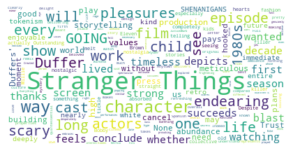

In [40]:
text = " ".join(i for i in data.Reviews)

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
nltk.download('vader_lexicon')
stemmer = nltk.SnowballStemmer("english") #must reimport to use stopwords again

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


What happens after cleaning the data?

In [44]:
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text   
#cleaning code from: https://thecleverprogrammer.com/2022/04/12/tiktok-reviews-sentiment-analysis-using-python/

In [45]:
data = pd.read_csv("reviews.csv", error_bad_lines=False,engine="python")
print(data.head())


   Unnamed: 0                                            Reviews
0           0  \r\n                    Stranger Things succee...
1           1  \r\n                    To conclude, Stranger ...
2           2  \r\n                    The Duffers' meticulou...
3           3  \r\n                    Trust us, from the mom...
4           4  \r\n                    SHENANIGANS ARE GOING ...


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [46]:
print(data.isnull().sum()) #no null values so no need to drop null values

Unnamed: 0    0
Reviews       0
dtype: int64


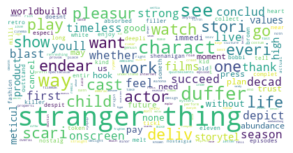

In [47]:
data["Reviews"] = data["Reviews"].apply(clean)
text = " ".join(i for i in data.Reviews)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
'''check if sentiments have changed now stopwords removed'''

sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Reviews"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Reviews"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Reviews"]]
print(data.head())

   Unnamed: 0                                            Reviews  Positive  \
0           0  \r                    stranger thing succeed o...     0.200   
1           1  \r                    conclud stranger thing b...     0.548   
2           2  \r                    duffer meticul worldbuil...     0.000   
3           3  \r                    trust us moment press pl...     0.322   
4           4  \r                    shenanigan go down\r    ...     0.000   

   Negative  Neutral  
0     0.000    0.800  
1     0.000    0.452  
2     0.257    0.743  
3     0.113    0.565  
4     0.000    1.000  


In [49]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Mostly Positive Wording")
    elif (b>a) and (b>c):
        print("Mostly Negative Wording ")
    else:
        print("Mostly informative")
sentiment_score(x, y, z)

print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Mostly informative
Positive:  3.548
Negative:  1.713
Neutral:  14.739


A lot of this code was borrowed from: 

https://thecleverprogrammer.com/2022/04/12/tiktok-reviews-sentiment-analysis-using-python/

as i have been learning from the tutorials on that website including the tiktok one.
